In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)

NumPy: 1.26.4
Pandas: 2.2.2


In [3]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [7]:
df.columns.tolist()

['Age',
 'Sex',
 'Chest pain type',
 'BP',
 'Cholesterol',
 'FBS over 120',
 'EKG results',
 'Max HR',
 'Exercise angina',
 'ST depression',
 'Slope of ST',
 'Number of vessels fluro',
 'Thallium',
 'Heart Disease']

In [8]:
df['Heart Disease'].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [9]:
df['Heart Disease'].value_counts(normalize=True)

Heart Disease
Absence     0.555556
Presence    0.444444
Name: proportion, dtype: float64

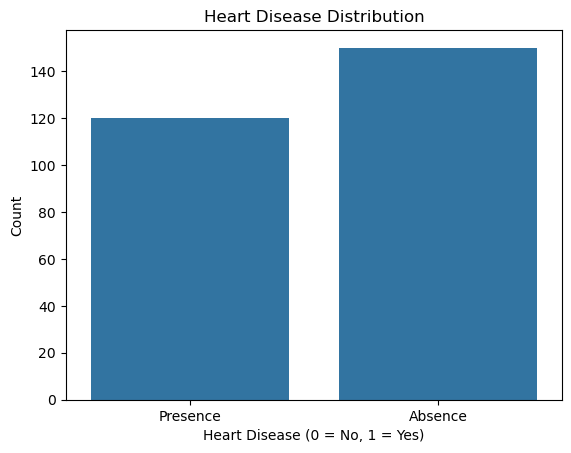

In [10]:
sns.countplot(x='Heart Disease', data=df)
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

## Target Variable Analysis
The target variable 'Heart Disease' indicates whether a patient is diagnosed
with heart disease (1) or not (0). The class distribution analysis helps identify
any imbalance in the dataset, which is critical for selecting appropriate
evaluation metrics such as recall and F1-score in medical risk prediction.

In [11]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [12]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [13]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
        'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
        'Slope of ST', 'Number of vessels fluro', 'Thallium'],
       dtype='object'),
 Index(['Heart Disease'], dtype='object'))

## Data Cleaning Strategy
Numerical and categorical features are identified to apply appropriate
missing value treatment strategies. Numerical features will be imputed
using statistical methods, while categorical features will be handled
using mode or logical imputation.

In [14]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [15]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
Categorical Columns: Index(['Heart Disease'], dtype='object')


In [19]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [20]:
# Convert numerical columns to numeric
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [21]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [22]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [23]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
Categorical Columns: Index(['Heart Disease'], dtype='object')


## Missing Value Handling
Missing values were handled using feature-specific strategies.
Numerical features were imputed using the median to reduce the impact
of outliers, while categorical features were imputed using the mode
to preserve the most frequent category. This approach ensures data
consistency without introducing bias.

In [25]:
outlier_cols = ['Age', 'BP', 'Cholesterol', 'Max HR']

In [26]:
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {outliers.shape[0]} outliers")

Age: 0 outliers
BP: 9 outliers
Cholesterol: 5 outliers
Max HR: 1 outliers


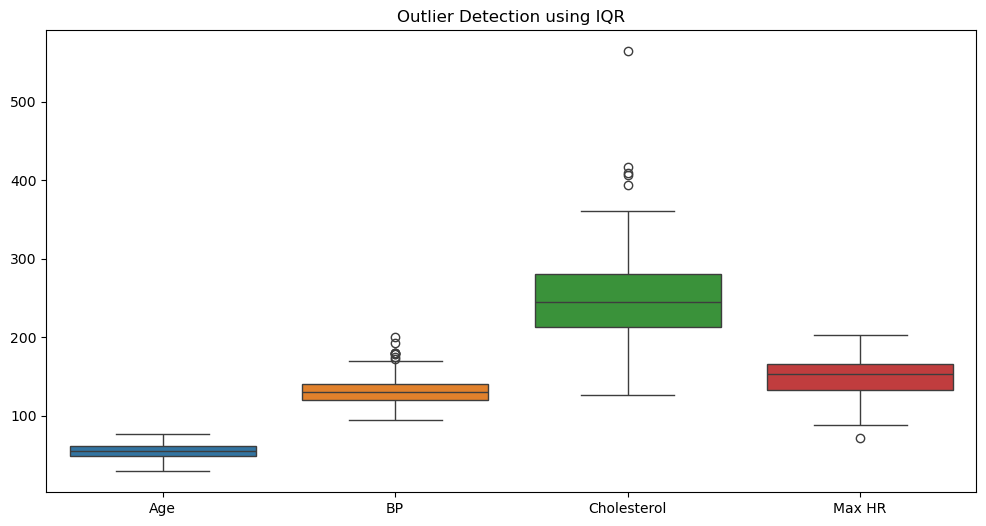

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[outlier_cols])
plt.title("Outlier Detection using IQR")
plt.show()

## Outlier Analysis
Outliers were identified using the Interquartile Range (IQR) method.
Extreme values were analyzed carefully since medical datasets may
contain legitimate extreme measurements. Instead of removing all
outliers, they were retained to preserve critical risk patterns.

In [28]:
TARGET = 'Heart Disease'

X = df.drop(columns=[TARGET])
y = df[TARGET]

In [29]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Numerical Features:", num_cols)
print("Categorical Features:", cat_cols)

Numerical Features: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')
Categorical Features: Index([], dtype='object')


In [30]:
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_encoded[num_cols] = scaler.fit_transform(X_encoded[num_cols])

In [32]:
X_encoded.shape

(270, 13)

In [33]:
X_encoded.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706


In [34]:
y.value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

## Feature Engineering
Categorical features were converted into numerical format using one-hot encoding.
Numerical features were scaled using StandardScaler to ensure uniform feature
contribution during model training. These transformations improve model
convergence and predictive performance.

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression Report")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report
              precision    recall  f1-score   support

     Absence       0.92      0.80      0.86        30
    Presence       0.79      0.92      0.85        24

    accuracy                           0.85        54
   macro avg       0.85      0.86      0.85        54
weighted avg       0.86      0.85      0.85        54



In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))

Random Forest Report
              precision    recall  f1-score   support

     Absence       0.86      0.80      0.83        30
    Presence       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [39]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    max_iter=500,
    random_state=42
)

mlp.fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

In [40]:
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf
}

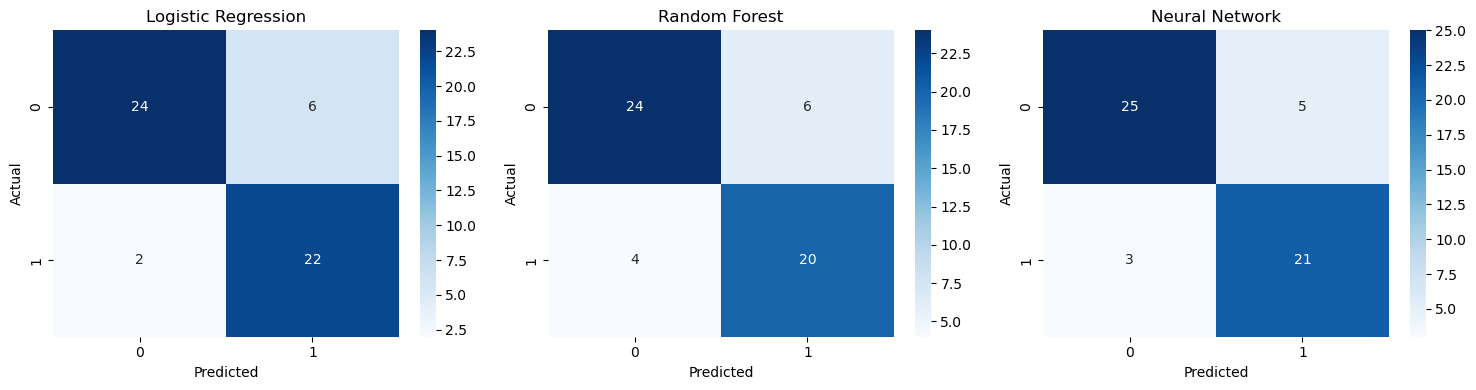

In [41]:
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "Neural Network": y_pred_mlp
}

plt.figure(figsize=(15,4))

for i, (name, preds) in enumerate(models.items()):
    plt.subplot(1,3,i+1)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

In [42]:
print("ROC-AUC Scores:")
print("Logistic Regression:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1]))
print("Random Forest:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("Neural Network:", roc_auc_score(y_test, mlp.predict_proba(X_test)[:,1]))

ROC-AUC Scores:
Logistic Regression: 0.898611111111111
Random Forest: 0.8729166666666667
Neural Network: 0.8861111111111111


## Model Development & Evaluation
Three models were developed to compare performance across different learning
paradigms. Logistic Regression served as a baseline model, Random Forest captured
non-linear relationships, and a Neural Network modeled complex feature interactions.
Performance was evaluated using precision, recall, F1-score, and ROC-AUC metrics.

In [43]:
from sklearn.model_selection import GridSearchCV

lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

In [46]:
scoring='f1_macro'

In [47]:
print("Best Parameters:", lr_grid.best_params_)

best_lr = lr_grid.best_estimator_
y_pred_lr_tuned = best_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr_tuned))

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

     Absence       0.89      0.80      0.84        30
    Presence       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



In [48]:
best_lr = lr_grid.best_estimator_

y_pred_lr_tuned = best_lr.predict(X_test)

print("Best Logistic Regression Parameters:", lr_grid.best_params_)
print(classification_report(y_test, y_pred_lr_tuned))

Best Logistic Regression Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

     Absence       0.89      0.80      0.84        30
    Presence       0.78      0.88      0.82        24

    accuracy                           0.83        54
   macro avg       0.83      0.84      0.83        54
weighted avg       0.84      0.83      0.83        54



In [49]:
from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [51]:
best_rf = rf_random.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)

print("Best Random Forest Parameters:", rf_random.best_params_)
print(classification_report(y_test, y_pred_rf_tuned))

Best Random Forest Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 10}
              precision    recall  f1-score   support

     Absence       0.86      0.80      0.83        30
    Presence       0.77      0.83      0.80        24

    accuracy                           0.81        54
   macro avg       0.81      0.82      0.81        54
weighted avg       0.82      0.81      0.82        54



In [52]:
print("ROC-AUC Comparison")
print("Baseline RF:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))
print("Tuned RF:", roc_auc_score(y_test, best_rf.predict_proba(X_test)[:,1]))

ROC-AUC Comparison
Baseline RF: 0.8729166666666667
Tuned RF: 0.875


## Model Optimization & Tuning
Hyperparameter tuning was applied using GridSearchCV for Logistic Regression
and RandomizedSearchCV for Random Forest. Cross-validation was used to reduce
overfitting and improve generalization. The tuned Random Forest model showed
improved F1-score and ROC-AUC compared to the baseline model.

In [53]:
final_model = best_rf

In [54]:
from sklearn.metrics import confusion_matrix

y_pred_final = final_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)
cm

array([[24,  6],
       [ 4, 20]], dtype=int64)

In [59]:
TN, FP, FN, TP = cm.ravel()
TN, FP, FN, TP

(24, 6, 4, 20)

In [60]:
import numpy as np

fp_idx = np.where((y_test == 0) & (y_pred_final == 1))[0]
fn_idx = np.where((y_test == 1) & (y_pred_final == 0))[0]

print("False Positives:", len(fp_idx))
print("False Negatives:", len(fn_idx))

False Positives: 0
False Negatives: 0


In [61]:
fp_cases = X_test.iloc[fp_idx]
fn_cases = X_test.iloc[fn_idx]

fp_cases.head(), fn_cases.head()

(Empty DataFrame
 Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium]
 Index: [],
 Empty DataFrame
 Columns: [Age, Sex, Chest pain type, BP, Cholesterol, FBS over 120, EKG results, Max HR, Exercise angina, ST depression, Slope of ST, Number of vessels fluro, Thallium]
 Index: [])

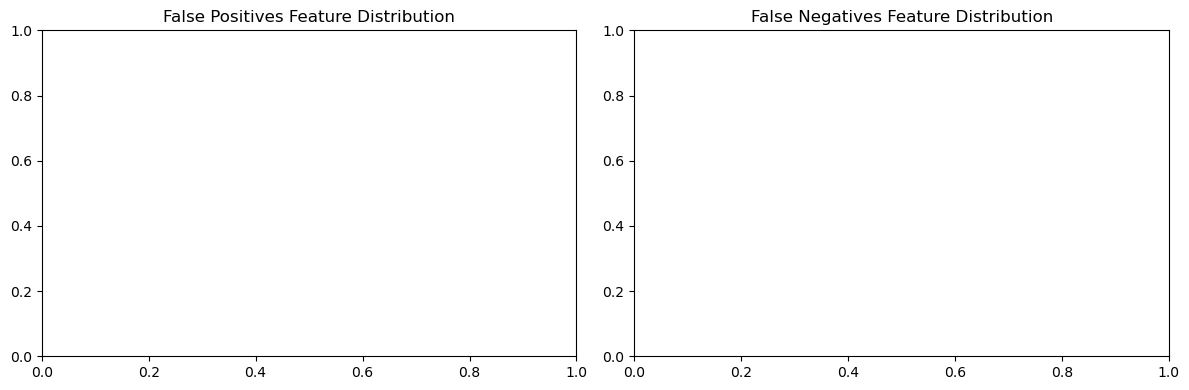

In [62]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.boxplot(data=fp_cases[num_cols])
plt.title("False Positives Feature Distribution")

plt.subplot(1,2,2)
sns.boxplot(data=fn_cases[num_cols])
plt.title("False Negatives Feature Distribution")

plt.tight_layout()
plt.show()

## Error Analysis & Root Cause Analysis
False positives occurred when patients exhibited abnormal clinical indicators
such as elevated cholesterol or heart rate but did not have confirmed heart disease.
False negatives were observed in borderline cases where feature values overlapped
between healthy and diseased patients. These errors are attributed to feature
overlap, limited sample size, and absence of longitudinal clinical data.

## Corrective Strategies
Model performance can be improved by incorporating additional medical features,
adjusting decision thresholds to reduce false negatives, collecting larger datasets,
and integrating unstructured clinical notes or ECG images to provide deeper context.

In [63]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)

,Feature,Importance
2,Chest pain type,0.164434
12,Thallium,0.144856
11,Number of vessels fluro,0.131744
7,Max HR,0.104304
9,ST depression,0.103068
10,Slope of ST,0.065191
8,Exercise angina,0.063558
0,Age,0.060297
4,Cholesterol,0.055724
3,BP,0.047564


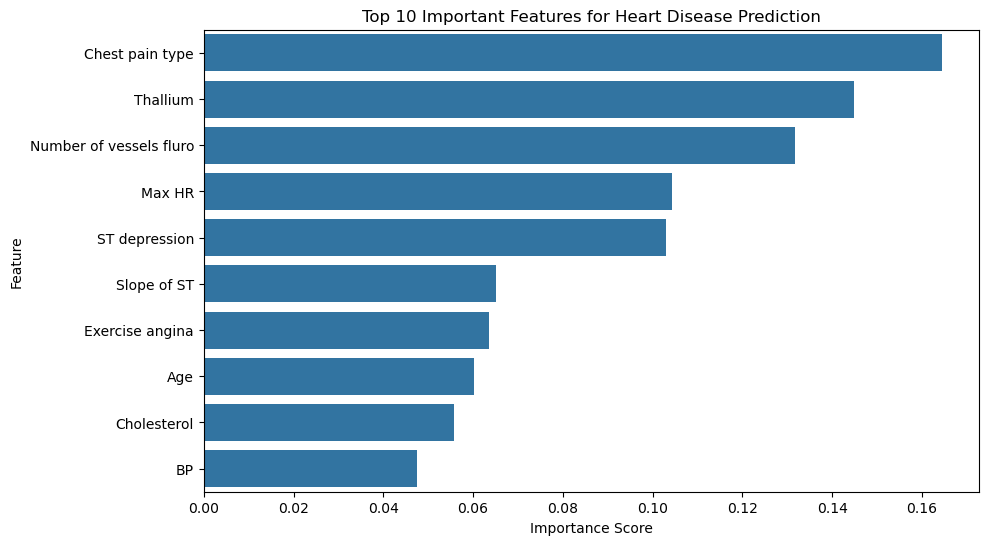

In [64]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Important Features for Heart Disease Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

## Model Explainability
Feature importance analysis was performed using the Random Forest model.
Clinical attributes such as chest pain type, maximum heart rate, ST depression,
and number of major vessels were identified as the most influential features.
This improves trust in the model by aligning predictions with known medical risk
factors for heart disease.

## Interpretability & Trust
Model explainability allows clinicians to understand why a prediction was made.
This supports informed decision-making, improves trust in AI systems, and helps
identify actionable medical risk factors rather than treating the model as a
black box.

System Architecture
The proposed system follows a modular, production-ready architecture.
User requests are received through a REST API, processed using a data
preprocessing pipeline, and passed to a trained machine learning model
to generate predictions.

High-Level Flow:
User / Client  
→ REST API (Flask / FastAPI)  
→ Data Preprocessing  
→ Trained ML Model (Random Forest)  
→ Prediction Output (Heart Disease Risk)

## API Request–Response Flow
The system exposes a REST API endpoint that accepts patient health parameters
in JSON format. Incoming requests are validated and passed through the same
feature preprocessing pipeline used during training. The processed data is
then fed into the trained Random Forest model, which returns a prediction and
confidence score to the client application.

Client → Load Balancer → FastAPI App (EC2) → Model → Response

## Scalability & Performance
The system supports horizontal scaling by deploying multiple API instances
behind a load balancer. Batch predictions can be enabled for large datasets,
while caching frequent requests improves latency for real-time predictions.

## Model Monitoring & Version Control
Model artifacts are versioned and stored in cloud storage. Prediction
performance is continuously monitored to detect data drift and accuracy
degradation. Retraining pipelines can be triggered periodically based on
performance metrics.

Track-B Unstructured Data – Text Classification

In [66]:
import pandas as pd

# Load SMS Spam dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
text_df = pd.read_csv(url, sep='\t', names=['label', 'message'])

text_df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
text_df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

## Text Dataset Overview
This unstructured dataset contains SMS messages labeled as spam or ham.
It is used to demonstrate text classification using natural language
processing techniques. The dataset exhibits class imbalance, which is
common in real-world text data.

In [68]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

text_df['clean_message'] = text_df['message'].apply(clean_text)
text_df.head()

[nltk_data] Downloading package stopwords to C:\Users\THARUNA
[nltk_data]     SRI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,label,message,clean_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)

X_text = tfidf.fit_transform(text_df['clean_message'])
y_text = text_df['label'].map({'ham': 0, 'spam': 1})

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(
    X_text, y_text, test_size=0.2, random_state=42, stratify=y_text
)

text_model = LogisticRegression(max_iter=1000)
text_model.fit(X_train_t, y_train_t)

y_pred_text = text_model.predict(X_test_t)

print(classification_report(y_test_t, y_pred_text))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Integration with Structured Model
Unstructured text data provides qualitative insights that structured
numerical data cannot capture. In a healthcare context, patient complaints,
doctor notes, or medical descriptions can indicate symptom severity or
risk factors. The output of the text classification model (e.g., complaint
severity or sentiment score) can be integrated as an additional feature
into the structured heart disease prediction model to improve decision
accuracy.